## Exercises
Use the included data matrix 'exercise_data.csv'. Solve the following exercises:

1. Load the data into a Pandas data frame.
1. Find all objects of class 1 whose height is over 25 units. Print all of their attributes. *Hint*: you can combine the results of two comparisons using the '&' operator (class is 1 *and* height is over 25). Parentheses may be needed.
1. Compute the mean of each attribute for the whole data.
1. Make a plot of weights (y axis) vs. heights (x axis).
1. Make a plot of weights (y axis) vs. "size" (=$height \cdot width^2$, x axis).
1. Like 4-5 but limited to objects of class 1.
1. Do you see anything interesting in the plots?

In [1]:
# 1
import pandas as pd
df = pd.read_csv('exercise_data.csv', index_col=0)
# Let's tell Pandas that class is a categorigal variable. This means that, for example, the average value
# of the attribute is not really a meaningful concept.
df['class'] = pd.Categorical(df['class'])

display(df, df.dtypes)

,height,width,weight,class
0,18.022890,5.182596,50.527110,1
1,16.194651,4.383156,28.829918,1
2,18.150373,4.556691,38.565482,1
3,13.846924,3.798662,16.413877,1
4,27.364656,7.777790,166.997659,1
5,23.024937,5.763639,82.780921,1
6,20.946903,5.595051,55.607831,1
7,21.672253,5.685999,70.678109,1
8,20.865806,5.476297,64.665380,1
9,21.653395,5.559328,66.614923,1


height     float64
width      float64
weight     float64
class     category
dtype: object

#### Explanation
In read_csv the parameter index_col=0 means that the rows get their names from the first column of the csv file. Without the parameter the row names would be the integers 0, 1, ... In our csv file the names in the first column happen to be the same but without the parameter the loaded table would also have a column called "Unnamed: 0".

Normally I probably would not bother to make the 'class' column categorical. The positive side here is that it is easy to exclude categorical columns when computing, e.g., mean values. But treating the column as categorical also means that we can't select classes 1 and 2 by a condition like df['class'] <= 2.

In [2]:
# 2
df[(df['class'] == 1) & (df['height'] > 25)]

,height,width,weight,class
4,27.364656,7.777790,166.997659,1
16,25.640493,6.852879,122.388594,1
21,25.343498,7.226682,135.671038,1
33,26.893780,7.624959,164.284870,1
44,32.085549,9.016029,263.542786,1


#### Explanation
The comparison df['class'] == 1 creates a Boolean vector. The i:th value of the vector tells whether 'class' is 1 in the i:th row of the DataFrame. Similarly, the result of the comparison df['height'] > 25 tells, for each row, whether the height of the object is over 25 units. The & operator is applied elementwise so that the i:th value of the result is True if and only if the i:th values of both input vectors are True. The parenthesis are needed due to the operator precedence rules of Python. As noted in the tutorial, df[bvec], where bvec is a Boolean vector, selects those rows of df for which the value of bvec is True. For instance, df[[True, False, True,...]] would select the first and third row but not the second row.

There are of course other ways to select the rows. For instance, some may find it clearer to do it in two phases:

In [3]:
result = df[df['class'] == 1]   # You might want to use more descriptive names than 'result'
result = result[result['height'] > 25]
display(result)

,height,width,weight,class
4,27.364656,7.777790,166.997659,1
16,25.640493,6.852879,122.388594,1
21,25.343498,7.226682,135.671038,1
33,26.893780,7.624959,164.284870,1
44,32.085549,9.016029,263.542786,1


In [4]:
# 3
df.mean(numeric_only=True)

height     31.938985
width      15.431009
weight    735.292601
dtype: float64

#### Explanation
The average class of all objects does not make much sense so we left it out by giving the parameter 'numeric_only=True'. This works because we made the column categorical in task 1.

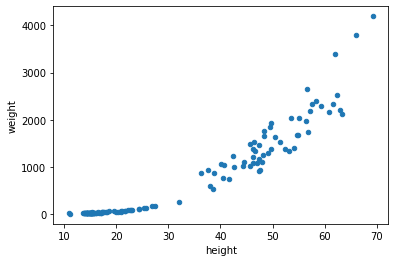

In [5]:
# 4
import matplotlib.pyplot as plt
%matplotlib inline
# Using Pandas, function scatter
df.plot.scatter('height', 'weight')

#### Explanation
Here we used the scatter plot function provided by Pandas DataFrames. There are many other ways to make a similar plot:

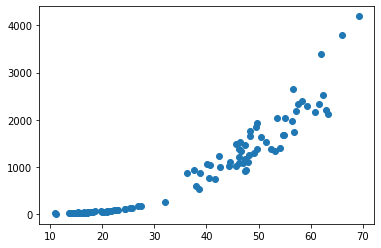

In [6]:
# df.plot('height', 'weight', kind='scatter')
# The next two ways don't give us axis labels. We could add them by using plt.xlabel(...) and plt.ylabel(...)
plt.scatter(df['height'], df['weight'])
#plt.plot(df['height'], df['weight'], 'o')

Text(0, 0.5, 'weight')

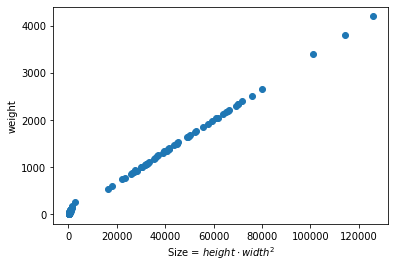

In [7]:
# 5
size = df['height'] * df['width']**2
plt.plot(size, df['weight'], 'o')
plt.xlabel('Size = $height \cdot width^2$')
plt.ylabel('weight')

#### Explanation
Here we used Matplotlib instead of df.scatter because 'size' is not a column of the data frame. Alternatively, we could have added it as a new column to df, after which we could have used df.scatter. The axis labels can contain formulas given in LaTeX format - although here we used them inconsistently as seen by comparing the italicizations in the axis labels

Text(0.5, 0, 'Size')

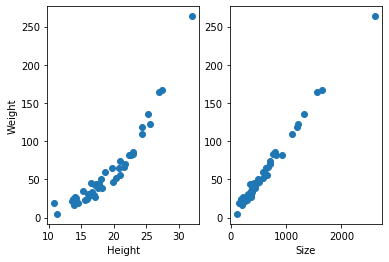

In [8]:
# 6
plt.subplot(1, 2, 1)
class_1_objects = df[df['class'] == 1]
plt.scatter(class_1_objects['height'], class_1_objects['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.subplot(1, 2, 2)
class_1_sizes = class_1_objects['height'] * class_1_objects['width']**2
plt.scatter(class_1_sizes, class_1_objects['weight'])
plt.xlabel('Size')

#### Explanation
Here I decided to place the two plot side by side. In the subplot command the first parameter gives the number of rows, the second parameter the number of columns and the third parameter the number of the current plot. Note that the number of a plot is a single number even if we want to stack several plots both vertically and horizontally.

[0.1018466] -1.2243805226467188


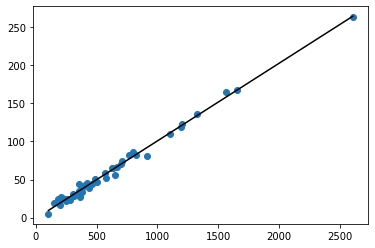

In [9]:
# 7
# In the 'size' vs. weight plots the points appear to lie close to a straight line.
# Let's try fitting a linear model to the size vs. weight data for objects of class 1
import sklearn.linear_model
import numpy as np
lm = sklearn.linear_model.LinearRegression()
lm.fit(class_1_sizes.values.reshape(-1, 1), class_1_objects['weight'])
xlims = np.array([class_1_sizes.min(), class_1_sizes.max()])
ylims = lm.predict(xlims.reshape(-1, 1))
plt.scatter(class_1_sizes, class_1_objects['weight'])
plt.plot(xlims, ylims, color='black')
# Finally, let's check the model coefficients
print(lm.coef_, lm.intercept_)
# The coefficients of the fitted model are quite close to the values that were used when generating this
# synthetic data set: slope 0.1 and intercept 0. Because some randomness was added to the weights in the data
# generation script, we can't expect to get exactly the expected slope and intercept.

#### Explanation
**Note:** the data used in this exercise had been generated artificially using simple formulas and random noise. The heights were first taken from normal distributions (one distribution for each class). The width was then height multiplied by a constant plus some random noise. Finally, weight was computed as $height \cdot width^2 \cdot constant + noise$. One can think of the constant as the density of the object, although we could also include geometry-related constants there if we thought that the objects are, e.g., cylinders.

The point here was just to notice the near linearity of the size vs. weight plots. It would be quite easy to predict the weight of an object based on its size and class. It would be more difficult to guess what kind of a functional dependence there might be between height and weight. Also, the weights of objects of a given height vary more than the weights of objects of a given size. Given the data generation process that is not surprising: randomness was added twice (first to width, then to weight that itself depends on width) after choosing the height of an object but only once after determining its size.